In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [8]:
df = pd.read_csv("../data/train_clean_final.csv")

# Separate features and target
X = df.drop(columns=["defects"])
y = df["defects"]

X.head()

,loc,v(g),ev(g),iv(g),n,v,l,d,i,e,...,t,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount
0,22.0,3.0,1.0,2.0,60.0,278.63,0.06,19.56,14.25,5448.79,...,302.71,17,1,1,0,16.0,9.0,38.0,22.0,5.0
1,14.0,2.0,1.0,2.0,32.0,151.27,0.14,7.00,21.11,936.71,...,52.04,11,0,1,0,11.0,11.0,18.0,14.0,3.0
2,11.0,2.0,1.0,2.0,45.0,197.65,0.11,8.05,22.76,1754.01,...,97.45,8,0,1,0,12.0,11.0,28.0,17.0,3.0
3,8.0,1.0,1.0,1.0,23.0,94.01,0.19,5.25,17.86,473.66,...,26.31,4,0,2,0,8.0,6.0,16.0,7.0,1.0
4,11.0,2.0,1.0,2.0,17.0,60.94,0.18,5.63,12.44,365.67,...,20.31,7,0,2,0,7.0,6.0,10.0,10.0,3.0


In [9]:
# Select the promising features identified from visualization
promising_features = [
    'loc', 'v(g)', 'ev(g)', 'iv(g)', 'n', 'v', 'e', 'b', 't',
    'lOCode', 'lOComment', 'lOBlank', 'locCodeAndComment',
    'uniq_Opnd', 'total_Op', 'total_Opnd', 'branchCount'
]

X = X[promising_features]

print("Features selected for ML:")
print(X.columns.tolist())


Features selected for ML:
['loc', 'v(g)', 'ev(g)', 'iv(g)', 'n', 'v', 'e', 'b', 't', 'lOCode', 'lOComment', 'lOBlank', 'locCodeAndComment', 'uniq_Opnd', 'total_Op', 'total_Opnd', 'branchCount']


In [17]:
# Numerical features
numerical_features =[
    'loc', 'v(g)', 'ev(g)', 'iv(g)', 'n', 'v', 'e', 'b', 't',
    'lOCode', 'lOComment', 'lOBlank', 'locCodeAndComment',
    'uniq_Opnd', 'total_Op', 'total_Opnd', 'branchCount'
]

In [11]:
# High-variance features (log-transform to reduce skew)
high_var_features = ['v', 'e', 't', 'total_Op', 'total_Opnd']  # adjust if column names differ
X[high_var_features] = X[high_var_features].apply(np.log1p)

# Standard scale all numerical features
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)


In [12]:
if len(categorical_features) > 0:
    ohe = OneHotEncoder(sparse=False, drop='first')
    X_ohe = pd.DataFrame(ohe.fit_transform(X[categorical_features]),
                         columns=ohe.get_feature_names_out(categorical_features))
    X_scaled = pd.concat([X_scaled.drop(columns=categorical_features), X_ohe], axis=1)


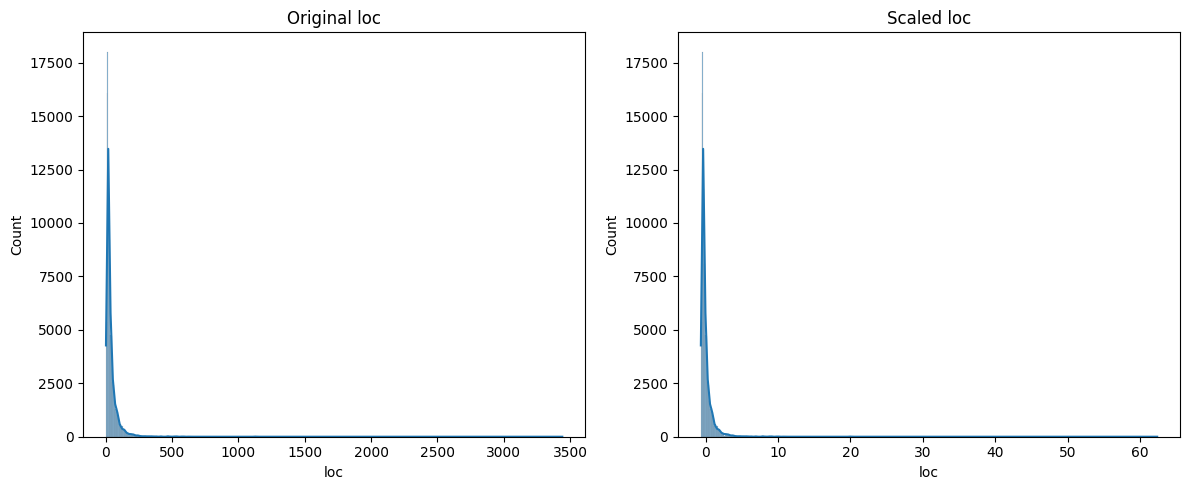

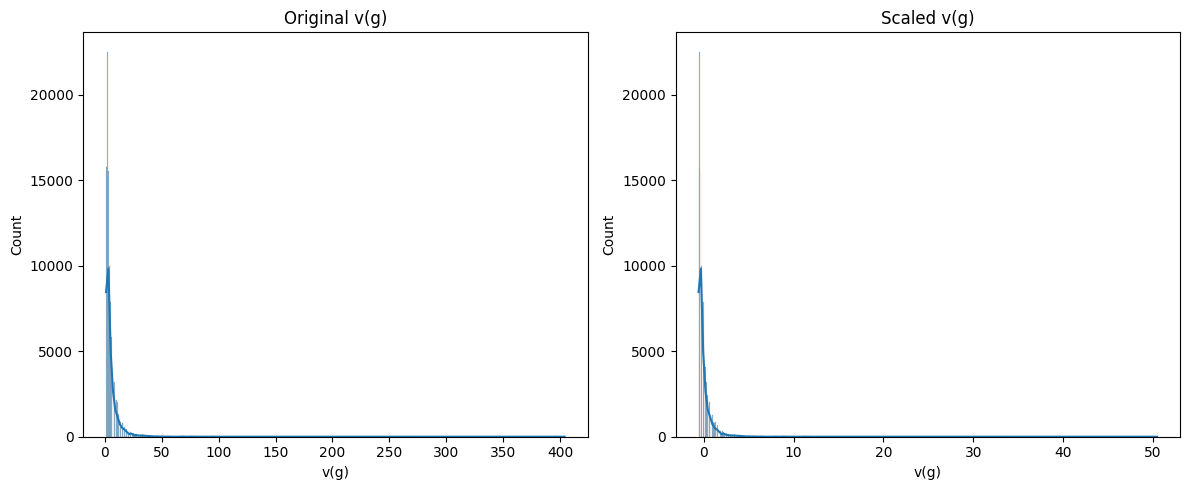

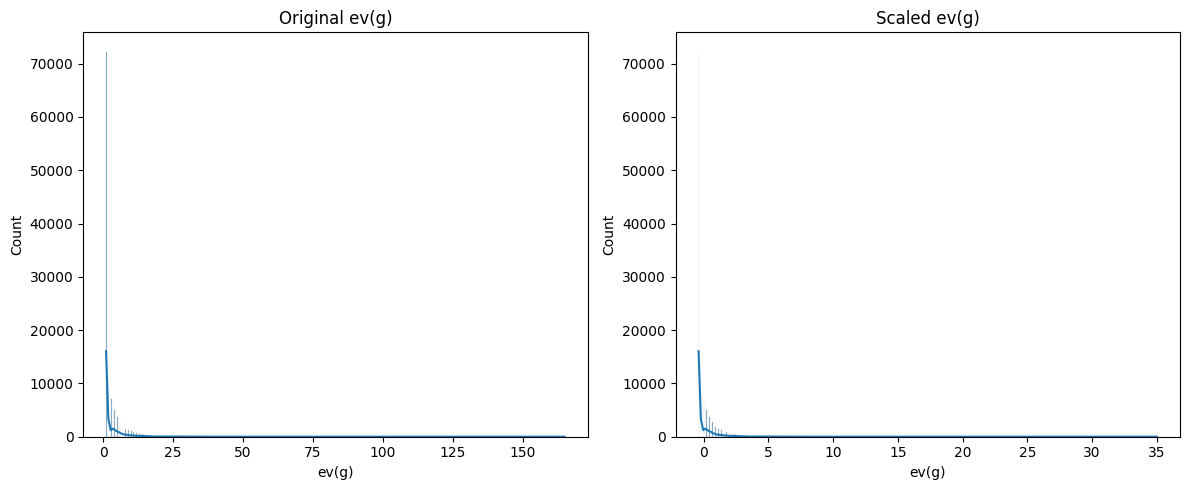

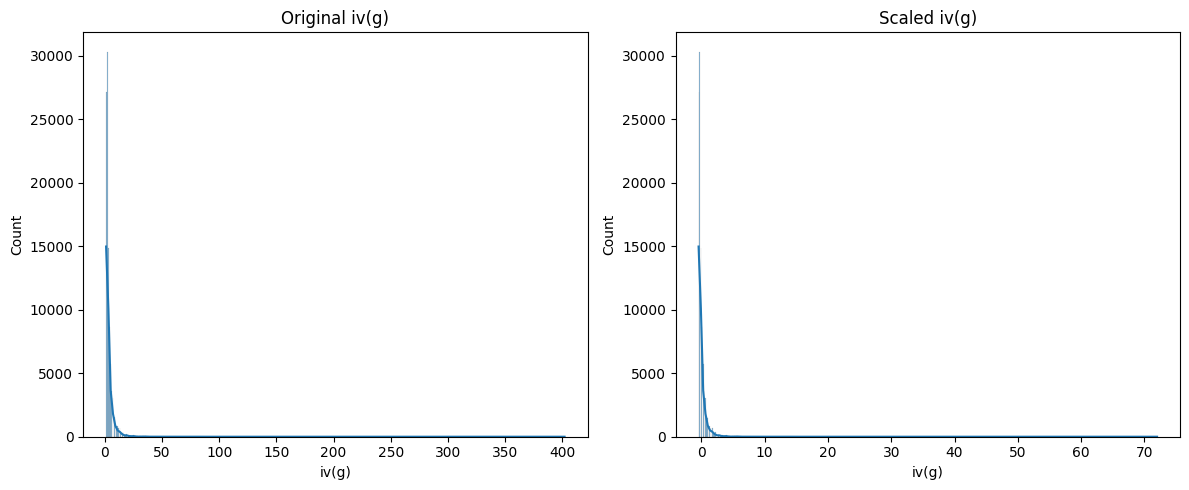

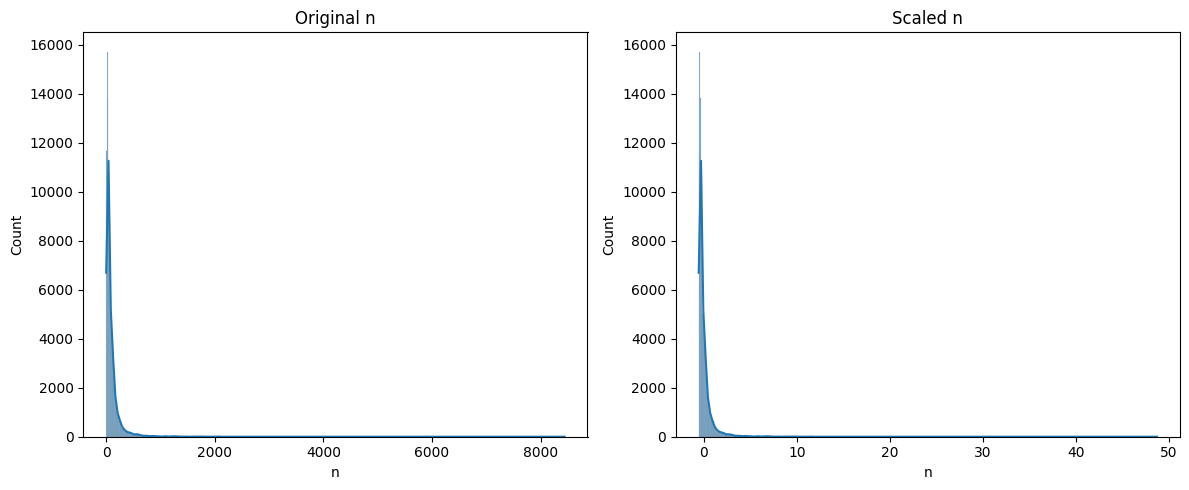

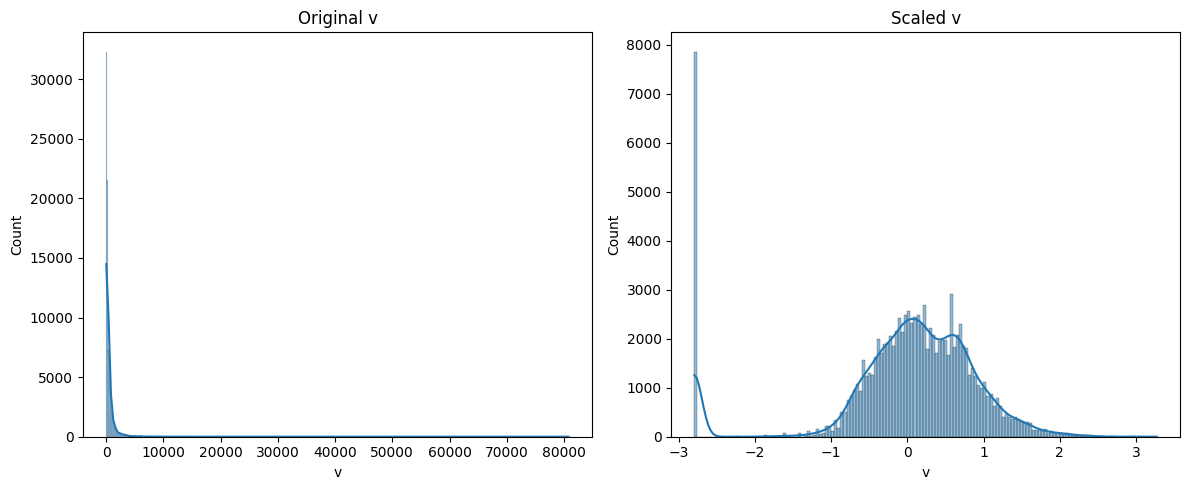

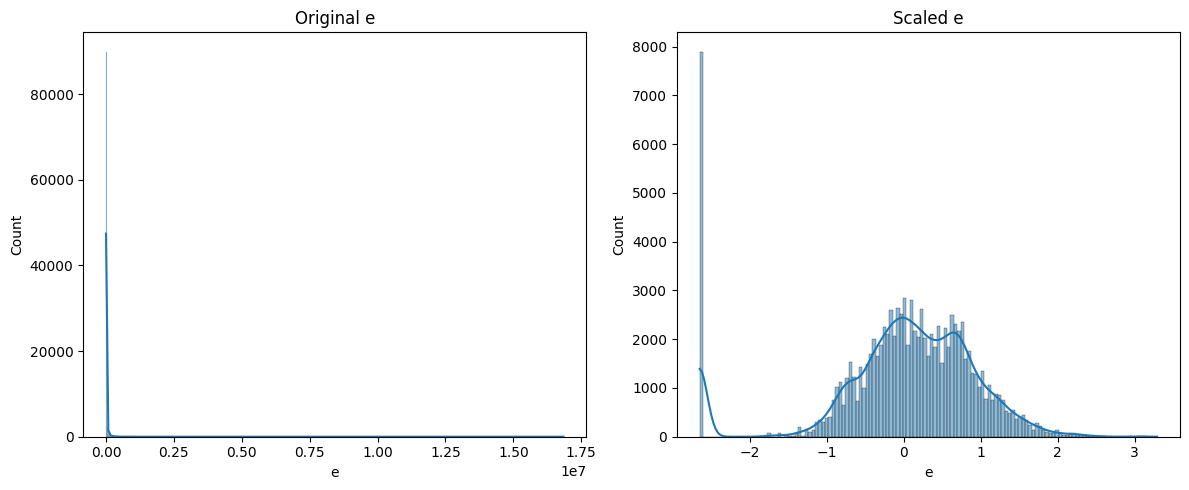

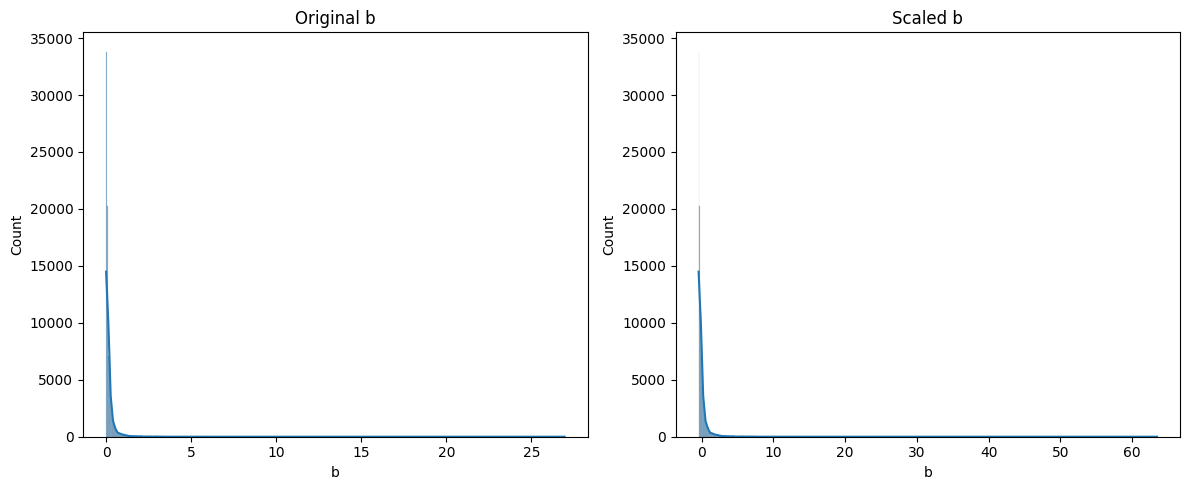

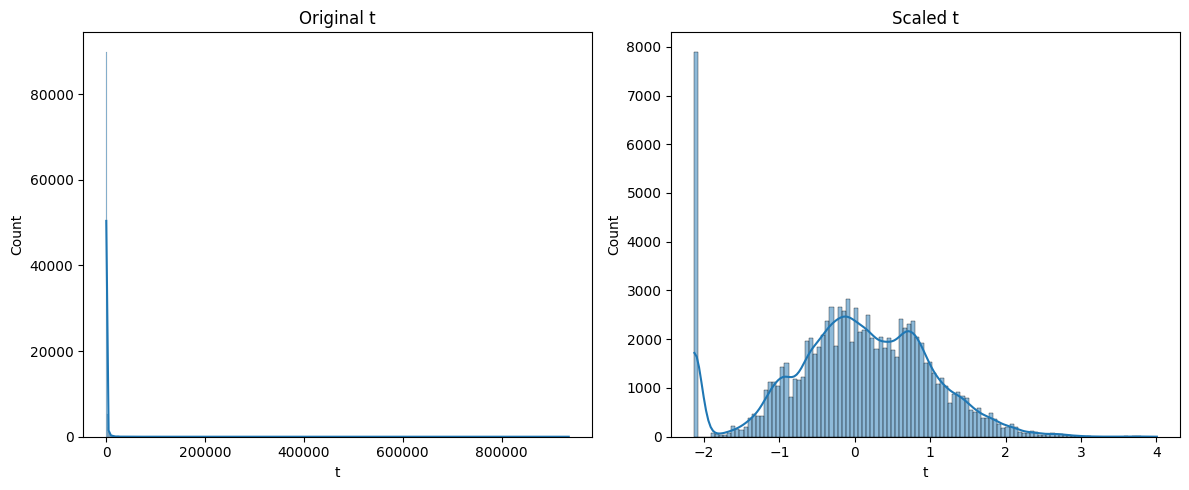

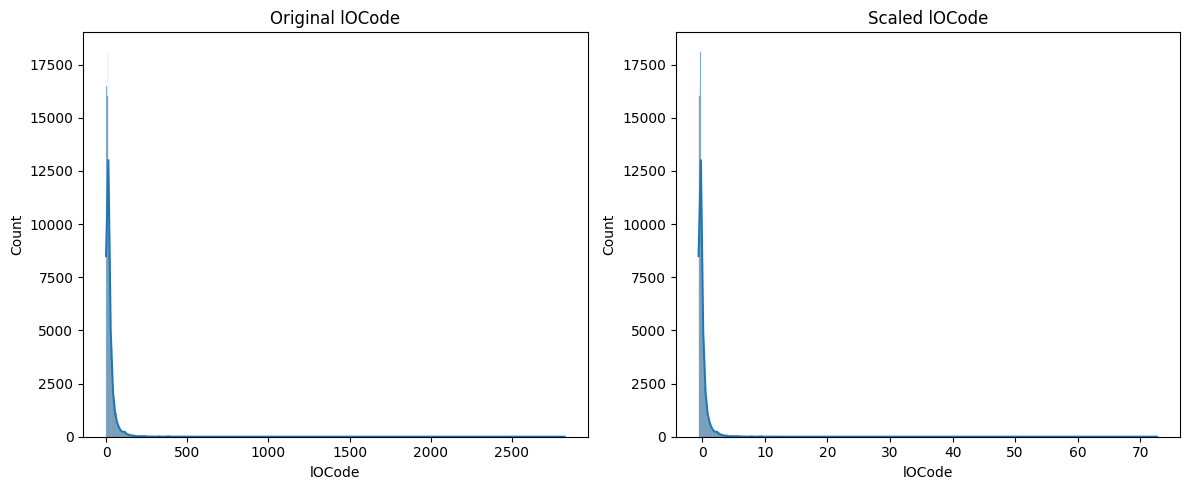

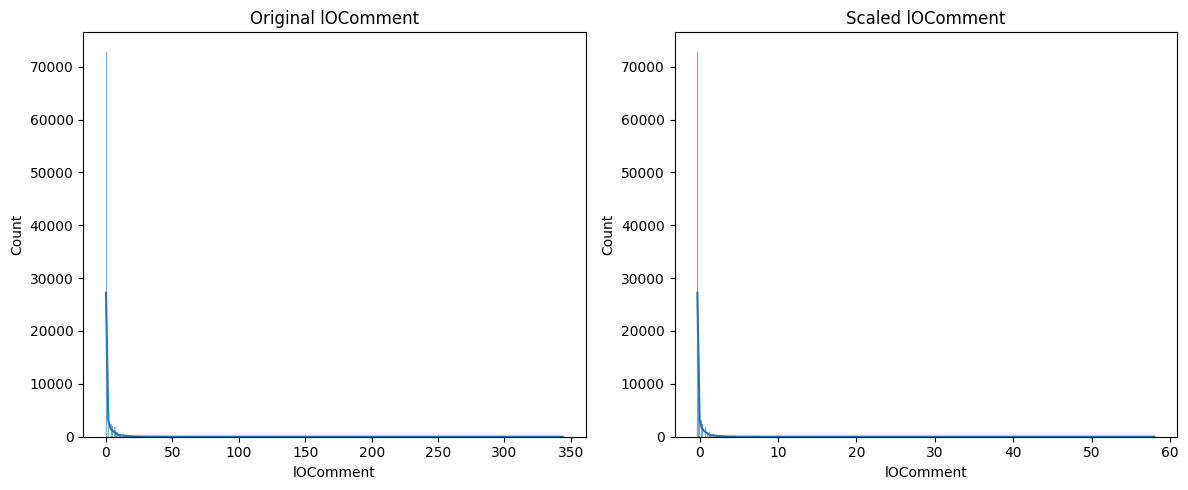

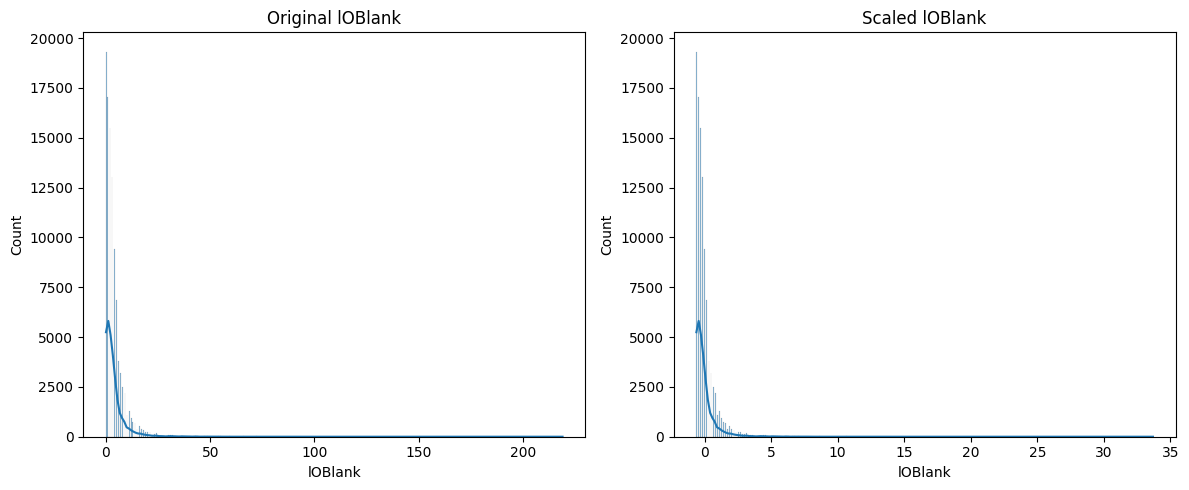

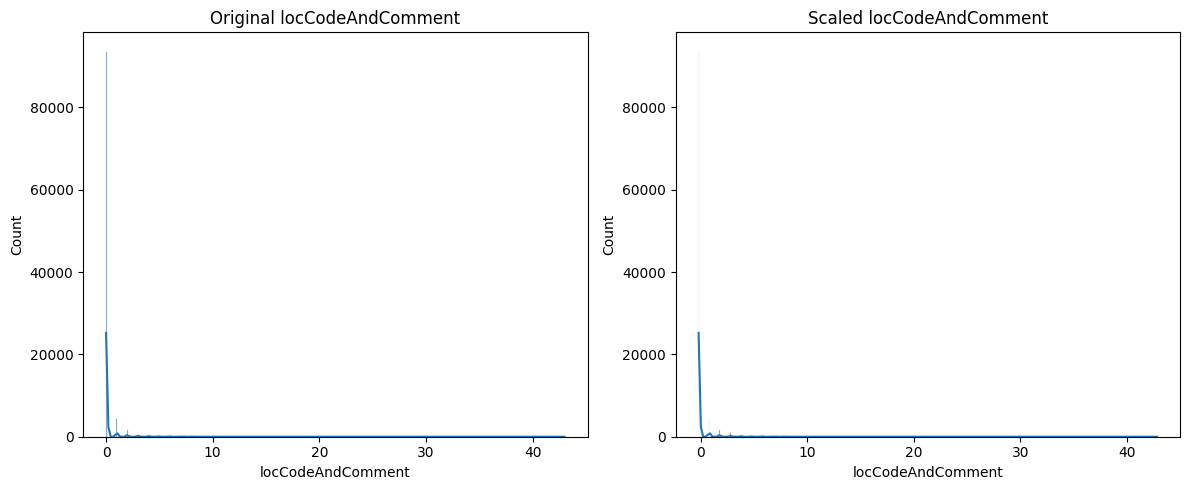

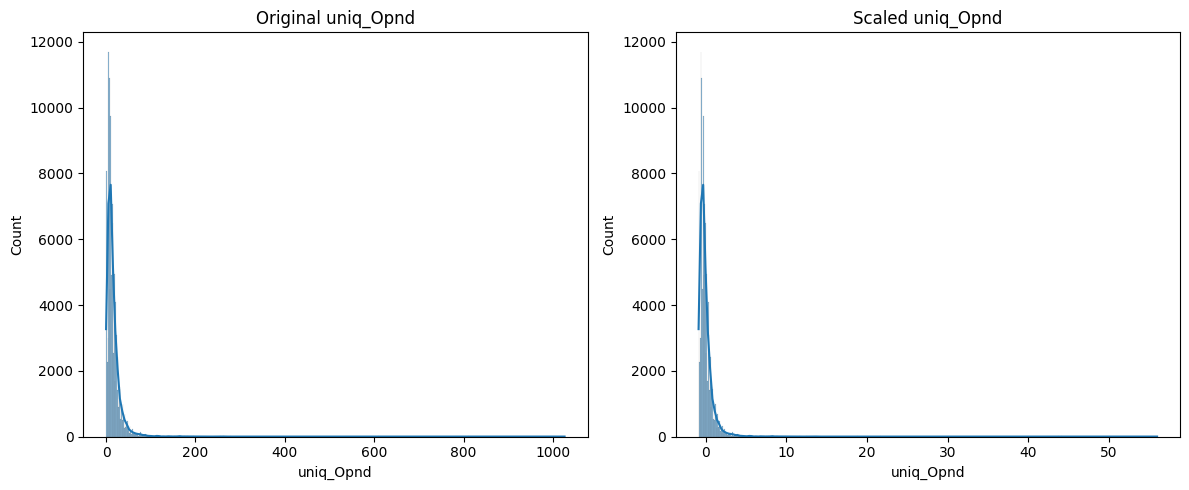

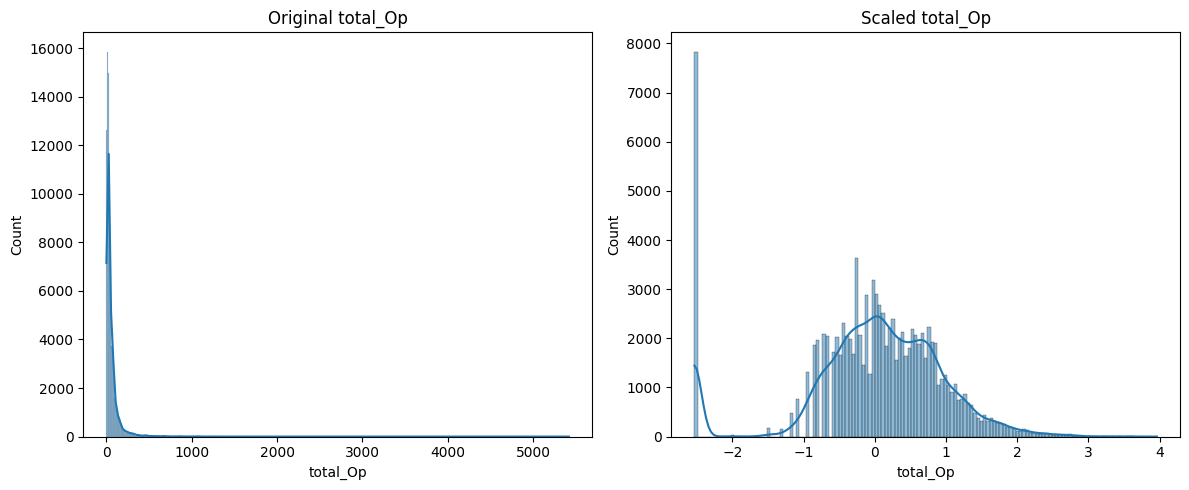

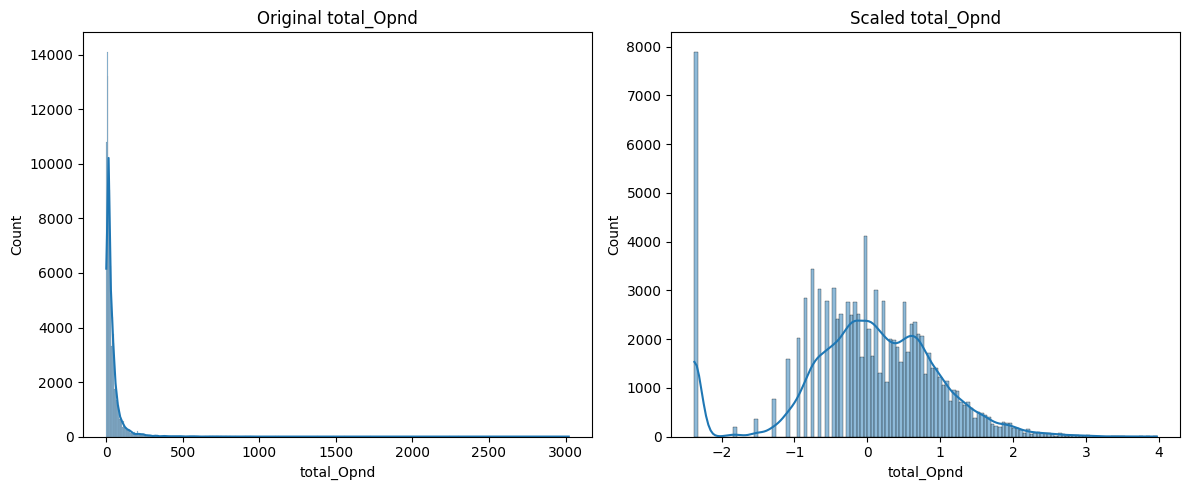

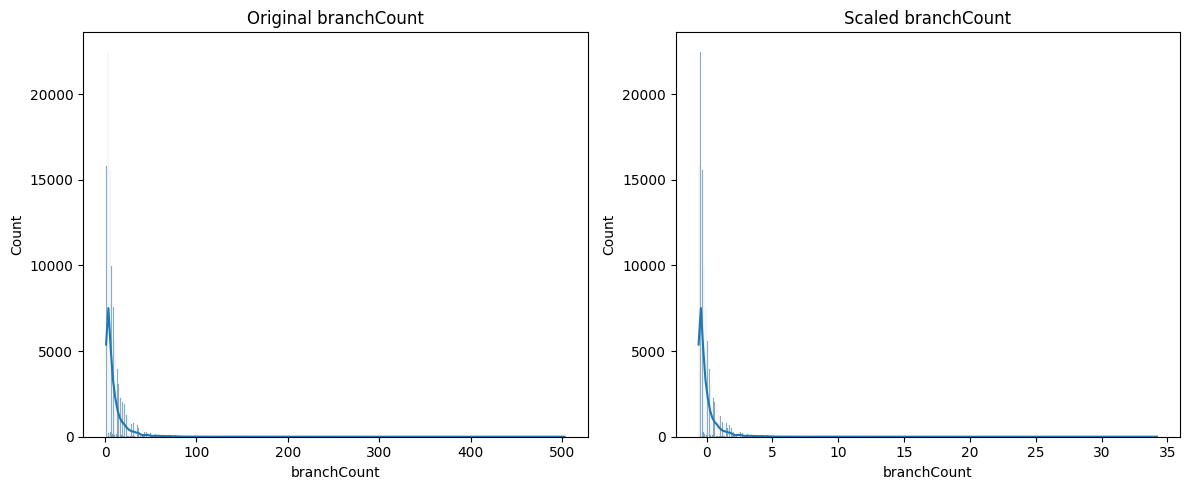

In [18]:
# Visualize all numerical features before and after scaling
for feature in numerical_features:
    plt.figure(figsize=(12,5))

    # Original distribution
    plt.subplot(1,2,1)
    sns.histplot(df[feature], kde=True)
    plt.title(f"Original {feature}")

    # Scaled distribution
    plt.subplot(1,2,2)
    sns.histplot(X_scaled[feature], kde=True)
    plt.title(f"Scaled {feature}")

    plt.tight_layout()
    plt.show()


In [19]:
df_prepared = pd.concat([X_scaled, y], axis=1)
df_prepared.to_csv("../data/train_prepared.csv", index=False)